In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X = iris.data[:,[2,3]]
y = iris.target

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.3, random_state=1, stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [12]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression(C=100.0, random_state=1,
                       solver='lbfgs', multi_class='ovr')

In [15]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [16]:
y_pred = lr.predict(X_test_std)
print('Misclassidfied samples: %d'%(y_test != y_pred).sum())

Misclassidfied samples: 1


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy is: %.3f'%accuracy_score(y_test,y_pred))
print('Accuracy: %.3f'%lr.score(X_test_std,y_test))

Accuracy is: 0.978
Accuracy: 0.978


In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

 

<ipython-input-18-56b9681b7f72>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1],


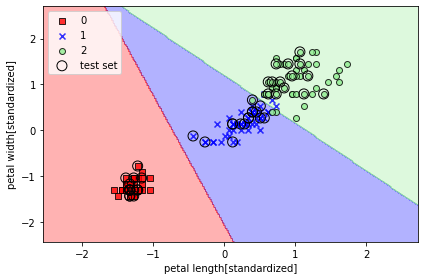

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
lr.predict_proba(X_test_std[:3,:])
# The highest value indicate the class membership of the flower 
# here we have a virginica, setosa, setosa

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [21]:
lr.predict_proba(X_test_std[7:10,:]).argmax(axis=1)
# Numpy's argmax function can get the class labels of predicted rows, 
# here we have a versicolor, virginica and setosa

array([1, 2, 0], dtype=int64)

In [22]:
# easier way to predict
lr.predict(X_test_std[10:14,:])

array([0, 2, 0, 1])

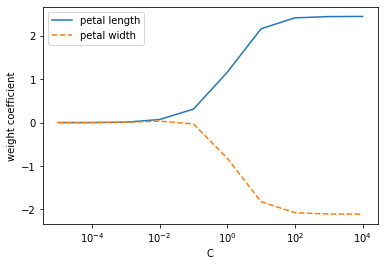

In [27]:
weights, params = [],[]
w0,w2 = [],[]
for c in np.arange(-5,5):
    lr=LogisticRegression(C=10.**c,random_state=1,
                          solver='lbfgs',multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    w0.append(lr.coef_[0])
    w2.append(lr.coef_[2])
    params.append(10.**c)
weights = np.array(weights)

plt.plot(params, weights[:,0],
        label='petal length')
plt.plot(params,weights[:,1],
        linestyle='--',
        label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log') 
plt.show()

The preceding code fitted 10 logistic regression models with different values for inverse-regularization parameter for c. The plot took the coefficients of class 1. The plot shows that the weight coefficients shrink if we decrease parameter c, that is, if we increase the regularization strength.